# Visualizing Batygin and Brown's Planet IX hypothesis


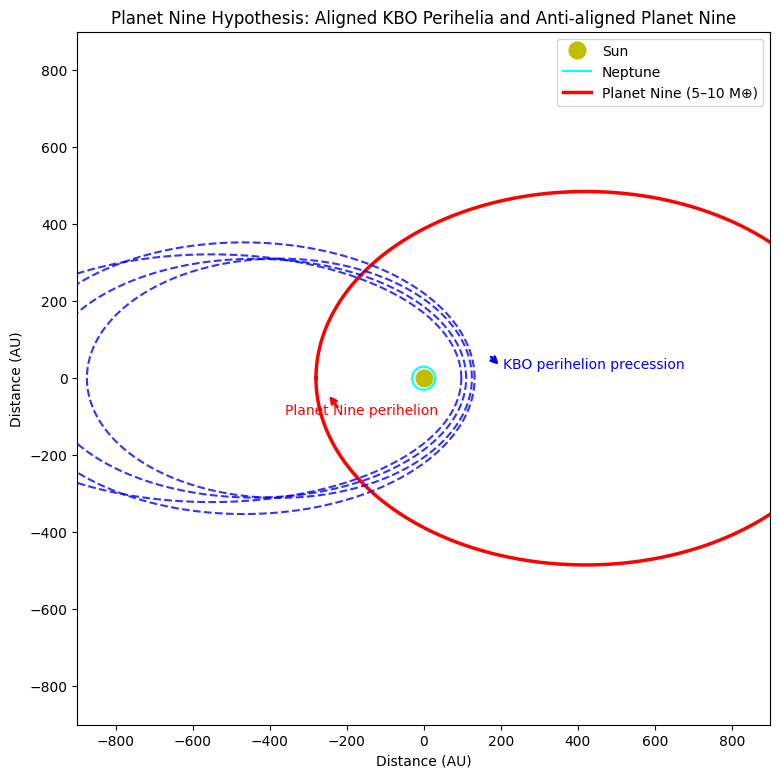

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



theta = np.linspace(0, 2*np.pi, 3000)

# Keplerian orbit (Sun at focus)
def kepler_orbit(a, e, omega=0.0, inc=0.0):
    r = a * (1 - e**2) / (1 + e * np.cos(theta))
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Rotate by argument of perihelion
    cosw, sinw = np.cos(omega), np.sin(omega)
    xw = cosw * x - sinw * y
    yw = sinw * x + cosw * y

    # Take into acount the inclination projection
    cosi = np.cos(inc)
    yi = cosi * yw

    return(xw, yi)

# Sun
SUN = (0, 0)

# Neptune
xN, yN = kepler_orbit(a=30, e=0.01)

# Planet Nine (anti-aligned)
a9, e9 = 700, 0.6
omega9 = np.pi
inc9 = np.deg2rad(30)
x9, y9 = kepler_orbit(a9, e9, omega9, inc9)

# Extreme KBOs (aligned perihelia)
kbo_params = [
    (500, 0.75),
    (550, 0.80),
    (600, 0.78),
    (650, 0.85)]

omega_kbo = 0.0
inc_kbo = np.deg2rad(20)

# Plot
fig, ax = plt.subplots(figsize=(9, 9))

# Plotting the Sun
ax.plot(0, 0, 'yo', markersize=12, label='Sun')

# Plotting Neptune
ax.plot(xN, yN, color='cyan', linewidth=1.5, label='Neptune')

# Plotting Planet Nine
ax.plot(x9, y9, color='red', linewidth=2.5, label='Planet Nine (5–10 M⊕)')

# Plotting the KBOs
for a, e in kbo_params:
    xk, yk = kepler_orbit(a, e, omega_kbo, inc_kbo)
    ax.plot(xk, yk, 'b--', alpha=0.8)

# --- Perihelion precession arrows ---
# KBO arrow
ax.annotate('', xy=(200, 30), xytext=(170, 60),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax.text(205, 25, 'KBO perihelion precession', color='blue')

# Planet Nine arrows
ax.annotate('', xy=(-250, -40), xytext=(-220, -80),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax.text(-360, -95, 'Planet Nine perihelion', color='red')

# Formatting
ax.set_aspect('equal', 'box')
ax.set_xlabel('Distance (AU)')
ax.set_ylabel('Distance (AU)')
ax.set_title('Planet Nine Hypothesis: Aligned KBO Perihelia and Anti-aligned Planet Nine')
ax.legend()
ax.set_xlim(-900, 900)
ax.set_ylim(-900, 900)

plt.show()

This visualizes the anti-alignment that Dr. Konstantine Batygin and Dr Mike Brown talk about in their 2016 paper.